In [1]:
trial = read.csv('clinical_trial.csv', stringsAsFactors=FALSE)

In [2]:
str(trial)

'data.frame':	1860 obs. of  3 variables:
 $ title   : chr  "Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962)." "Cell mediated immune status in malignancy--pretherapy and post-therapy assessment." "Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breast cancer: phase "| __truncated__ "Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by Paclitaxel for early breast can"| __truncated__ ...
 $ abstract: chr  "" "Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population before and after in"| __truncated__ "BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with unfavorable outcom"| __truncated__ "BACKGROUND: Taxanes are among the most active drugs for the treatment of metastatic breast cancer, and, as a consequence, they "| __trunc

In [3]:
summary(trial)

    title             abstract             trial       
 Length:1860        Length:1860        Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.4392  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  

In [4]:
summary(nchar(trial$abstract)) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1195    1583    1480    1820    3708 

In [5]:
table(nchar(trial$abstract) == 0)


FALSE  TRUE 
 1748   112 

In [6]:
which.min(nchar(trial$title))

[1] 1258

In [7]:
trial$title[1258]

[1] "A decade of letrozole: FACE."

In [8]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [11]:
# Create corpus
corpusTitle = Corpus(VectorSource(trial$title))
corpusTitle = tm_map(corpusTitle, tolower)
corpusTitle = tm_map(corpusTitle, PlainTextDocument)
corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusTitle = tm_map(corpusTitle, removeWords, stopwords("english"))
corpusTitle = tm_map(corpusTitle, stemDocument)
dtmTitle = DocumentTermMatrix(corpusTitle)
dtmTitle = removeSparseTerms(dtmTitle, 0.95)
dtmTitle

<<DocumentTermMatrix (documents: 1860, terms: 31)>>
Non-/sparse entries: 10684/46976
Sparsity           : 81%
Maximal term length: 15
Weighting          : term frequency (tf)

In [12]:
corpusAbstract = Corpus(VectorSource(trial$abstract))
corpusAbstract = tm_map(corpusAbstract, tolower)
corpusAbstract = tm_map(corpusAbstract, PlainTextDocument)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords("english"))
corpusAbstract = tm_map(corpusAbstract, stemDocument)
dtmAbstract = DocumentTermMatrix(corpusAbstract)
dtmAbstract = removeSparseTerms(dtmAbstract, 0.95)
dtmAbstract

<<DocumentTermMatrix (documents: 1860, terms: 335)>>
Non-/sparse entries: 92016/531084
Sparsity           : 85%
Maximal term length: 15
Weighting          : term frequency (tf)

In [20]:
dtmTitle = as.data.frame(as.matrix(dtmTitle))
dtmAbstract = as.data.frame(as.matrix(dtmAbstract))

In [21]:
csAbstract = colSums(dtmAbstract)

which.max(csAbstract)

patient 
    212

In [24]:
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))

colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

In [28]:
dtm = cbind(dtmTitle, dtmAbstract)

Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

In [29]:
colnames(dtm)

[1] "T Tadjuv"           "T Tadvanc"          "T Tbreast"         
  [4] "T Tcancer"          "T Tchemotherapi"    "T Tclinic"         
  [7] "T Tcombin"          "T Tcompar"          "T Tcyclophosphamid"
 [10] "T Tdocetaxel"       "T Tdoxorubicin"     "T Tearli"          
 [13] "T Teffect"          "T Tgroup"           "T Tiii"            
 [16] "T Tmetastat"        "T Tpatient"         "T Tphase"          
 [19] "T Tplus"            "T Tpostmenopaus"    "T Trandom"         
 [22] "T Trandomis"        "T Trespons"         "T Tresult"         
 [25] "T Tstudi"           "T Ttamoxifen"       "T Ttherapi"        
 [28] "T Ttreatment"       "T Ttrial"           "T Tversus"         
 [31] "T Twomen"           "A A0001"            "A A001"            
 [34] "A A005"             "A A100"             "A A500"            
 [37] "A A5fluorouracil"   "A Aaccord"          "A Aachiev"         
 [40] "A Aactiv"           "A Aaddit"           "A Aadjuv"          
 [43] "A Aadminist"        "A Aadministr"       "A Aadvanc"         
 [46] "A Aadvers"          "A Aage"             "A Aagent"          
 [49] "A Aaim"             "A Aalon"            "A Aalso"           
 [52] "A Aalthough"        "A Aamong"           "A Aanalys"         
 [55] "A Aanalysi"         "A Aanalyz"          "A Aandor"          
 [58] "A Aanthracyclin"    "A Aappear"          "A Aarm"            
 [61] "A Aaromatas"        "A Aassess"          "A Aassign"         
 [64] "A Aassoci"          "A Aavail"           "A Aaxillari"       
 [67] "A Abackground"      "A Abase"            "A Abaselin"        
 [70] "A Abenefit"         "A Abetter"          "A Abone"           
 [73] "A Abreast"          "A Acan"             "A Acancer"         
 [76] "A Acarcinoma"       "A Acase"            "A Acaus"           
 [79] "A Acell"            "A Achang"           "A Acharacterist"   
 [82] "A Achemotherapi"    "A Aclinic"          "A Acmf"            
 [85] "A Acombin"          "A Acommon"          "A Acompar"         
 [88] "A Acomparison"      "A Acomplet"         "A Aconclus"        
 [91] "A Aconduct"         "A Aconfid"          "A Aconfirm"        
 [94] "A Aconsid"          "A Aconsist"         "A Acontinu"        
 [97] "A Acontrol"         "A Acorrel"          "A Acours"          
[100] "A Acycl"            "A Acyclophosphamid" "A Adaili"          
[103] "A Adata"            "A Aday"             "A Adeath"          
[106] "A Adecreas"         "A Adefin"           "A Ademonstr"       
[109] "A Adesign"          "A Adetect"          "A Adetermin"       
[112] "A Adevelop"         "A Adfs"             "A Adiffer"         
[115] "A Adiseas"          "A Adiseasefre"      "A Adistant"        
[118] "A Adocetaxel"       "A Adose"            "A Adoubleblind"    
[121] "A Adoxorubicin"     "A Adrug"            "A Adue"            
[124] "A Adurat"           "A Aearli"           "A Aeffect"         
[127] "A Aefficaci"        "A Aeight"           "A Aeither"         
[130] "A Aelig"            "A Aend"             "A Aendocrin"       
[133] "A Aendpoint"        "A Aenrol"           "A Aenter"          
[136] "A Aepirubicin"      "A Aestim"           "A Aestrogen"       
[139] "A Aevalu"           "A Aevent"           "A Aeveri"          
[142] "A Aevid"            "A Aexamin"          "A Aexperienc"      
[145] "A Aexpress"         "A Afactor"          "A Afailur"         
[148] "A Afind"            "A Afirst"           "A Afirstlin"       
[151] "A Afive"            "A Afluorouracil"    "A Afollow"         
[154] "A Afollowup"        "A Afound"           "A Afour"           
[157] "A Afrequent"        "A Afunction"        "A Ageneral"        
[160] "A Agiven"           "A Agrade"           "A Agreater"        
[163] "A Agroup"           "A Agrowth"          "A Ahazard"         
[166] "A Ahematolog"       "A Aher2"            "A Ahigh"           
[169] "A Ahigher"          "A Ahistolog"        "A Ahormon"         
[172] "A Ahowev"           "A Ahuman"           "A Ahundr"          


In [32]:
dtm$trial = trial$trial

In [35]:
str(colnames(dtm))

 chr [1:367] "T Tadjuv" "T Tadvanc" "T Tbreast" "T Tcancer" ...


In [36]:
library(caTools)

set.seed(144)

split = sample.split(dtm$trial, SplitRatio = 0.7)

train = subset(dtm, split==TRUE)
test = subset(dtm, split==FALSE)

In [37]:
table(train$trial)


  0   1 
730 572 

In [38]:
730/(730+572)

[1] 0.5606759

In [39]:
library(rpart)
library(rpart.plot)

trialCART = rpart(trial ~ ., data=train, method="class")

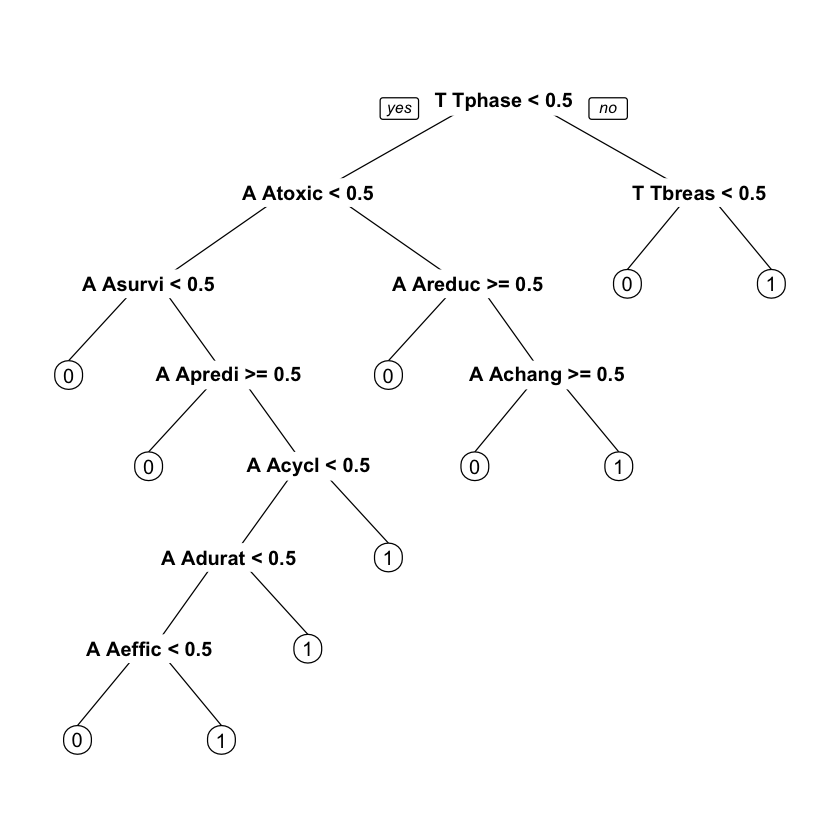

In [40]:
prp(trialCART)

In [45]:
predictTrain = predict(trialCART)

In [55]:
predictTrain

,0,1
1,0.8636364,0.1363636
2,0.8636364,0.1363636
3,0.1281139,0.8718861
5,0.2176871,0.7823129
6,0.94545455,0.05454545
7,0.2176871,0.7823129
10,0.1281139,0.8718861
12,0.7125,0.2875
13,0.1281139,0.8718861
14,0.7125,0.2875


In [57]:
max(predictTrain[,2])

[1] 0.8718861

In [58]:
table(train$trial, predictTrain[,2] > 0.5)

   
    FALSE TRUE
  0   631   99
  1   131  441

In [59]:
(631 + 441) / (631 + 441 +99 +131)

[1] 0.8233487

In [60]:
441/(131+441)

[1] 0.770979

In [62]:
631/(631+99)

[1] 0.8643836

In [63]:
predictTest = predict(trialCART, newdata=test)


In [64]:
table(test$trial, predictTest[,2] > 0.5)

   
    FALSE TRUE
  0   261   52
  1    83  162

In [65]:
(261 + 162)/ (261 + 162+83+52)

[1] 0.7580645

In [67]:
# Test set AUC 
library(ROCR)
ROCRpred = prediction(predictTest[,2], test$trial)
as.numeric(performance(ROCRpred, "auc")@y.values)

[1] 0.8371063